# DATA ANALYSIS FOR VISITORS TO KENYA BETWEEN 1991-2014

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Read Datasets 

In [66]:
df= pd.read_csv('Visitors_to_Kenya_between1991_to_2014_For_Developers.csv',index_col='OBJECTID')

df.drop(columns='Year_Text',inplace=True)
#df.Year_Text=df.Year_Text.astype('int')

In [67]:

df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status
OBJECTID,,,,,,
0,Arrivals,03/31/2005 12:00:00 AM,264600,Visitors on Holiday,Q1,Actual
1,Arrivals,06/30/1991 12:00:00 AM,149400,Visitors on Holiday,Q2,Actual


In [68]:
#df.isnull().sum().sum() IS ZERO

### Getting outliers using (mean+-1.968std) in coulmns then replacing with mean value

In [69]:
Meangrade=df['No_of_Visitors_to_Kenya'].mean()
std=df['No_of_Visitors_to_Kenya'].std()
toprange=Meangrade+std*1.96
bottomrange=Meangrade-std*1.96
df=df.replace(to_replace=(df[df['No_of_Visitors_to_Kenya']>toprange].index),value=Meangrade)
df=df.replace(to_replace=(df[df['No_of_Visitors_to_Kenya']<bottomrange].index),value=Meangrade)

### Convertion of time into pandas datetime format

In [70]:
df['Date_End_of_Quater']=df['Date_End_of_Quater'].map(pd.to_datetime)

### Function for Calling the year and creating a year column

In [71]:
def get_year(DT):
    return DT.year
df['Year']=df['Date_End_of_Quater'].map(get_year)
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,Year
OBJECTID,,,,,,,
0,Arrivals,2005-03-31,264600,Visitors on Holiday,Q1,Actual,2005
1,Arrivals,1991-06-30,149400,Visitors on Holiday,Q2,Actual,1991


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 7 columns):
Arrival_or_Departure       832 non-null object
Date_End_of_Quater         832 non-null datetime64[ns]
No_of_Visitors_to_Kenya    832 non-null int64
Visitors_by_Purpose        832 non-null object
Period_Quater              832 non-null object
Results_Status             832 non-null object
Year                       832 non-null int64
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 39.0+ KB


### Sorting Year_Text column in Ascending Order

In [73]:
df=df.sort_values(by='Year',ascending=True)
df.head(2)

,Arrival_or_Departure,Date_End_of_Quater,No_of_Visitors_to_Kenya,Visitors_by_Purpose,Period_Quater,Results_Status,Year
OBJECTID,,,,,,,
128,Departures,1991-03-31,149300,Visitors on Holiday,Q1,Actual,1991
168,Departures,1991-09-30,156200,Visitors on Holiday,Q3,Actual,1991


# DATA VISUALIZATION

### Quick visualization of how different columns relate

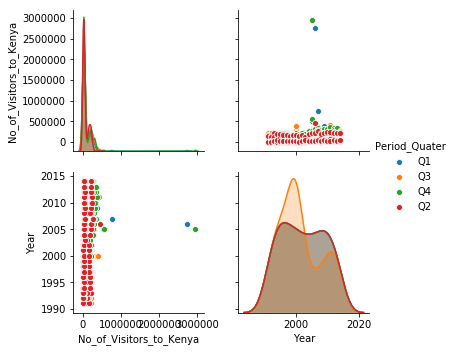

In [74]:
sns.pairplot(data=df,hue='Period_Quater')

## Scatter Plot With Regressionline

Text(0.5, 1.0, 'Scatterplot representing how the no of visitors have been distributed')

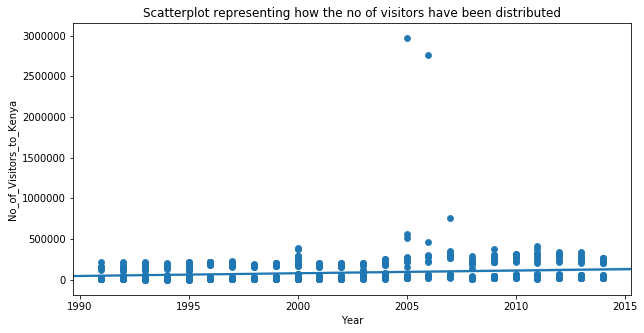

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year',y='No_of_Visitors_to_Kenya',data=df)
sns.regplot(x='Year',y='No_of_Visitors_to_Kenya',data=df)
plt.title('Scatterplot representing how the no of visitors have been distributed')

## Line Plot

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


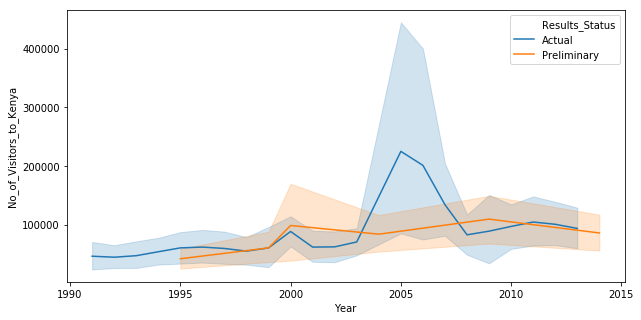

In [76]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Results_Status']))

#print(plt.title())

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


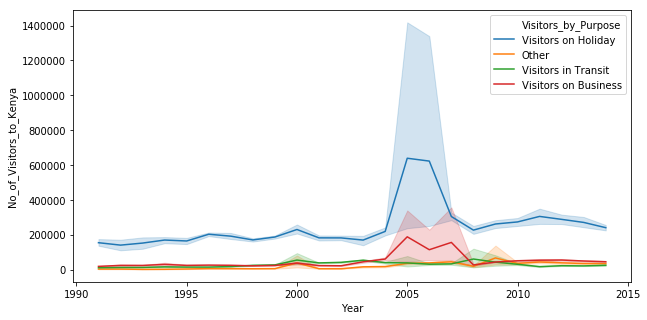

In [77]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Visitors_by_Purpose']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


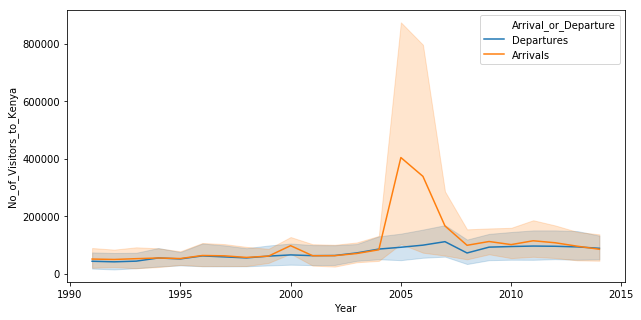

In [78]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Arrival_or_Departure']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


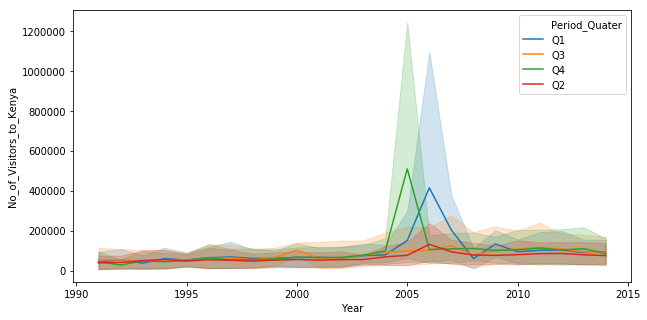

In [79]:
print(plt.figure(figsize=(10,5)))
print(sns.lineplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Period_Quater']))

## Bar Plot

Figure(720x288)
AxesSubplot(0.125,0.125;0.775x0.755)


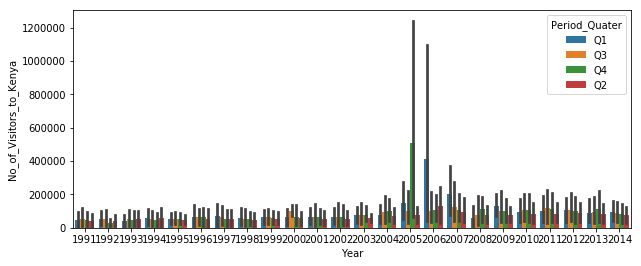

In [80]:
print(plt.figure(figsize=(10,4)))
print(sns.barplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Period_Quater']))

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


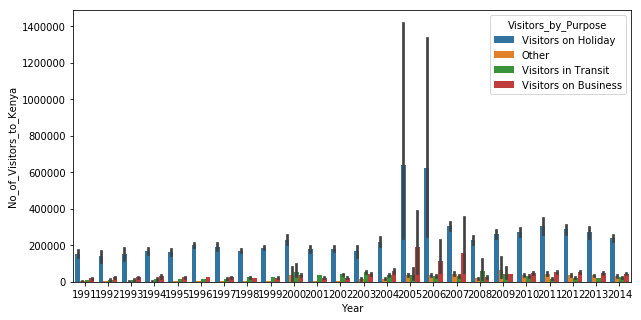

In [81]:
print(plt.figure(figsize=(10,5)))
print(sns.barplot(df['Year'],df['No_of_Visitors_to_Kenya'],hue=df['Visitors_by_Purpose']))

## Swarm plot

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'Distribution of No of Visitors in each Quater')


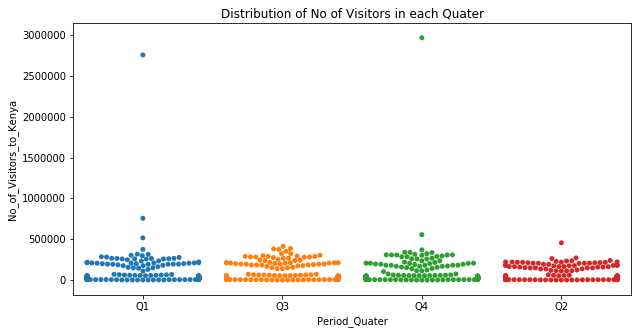

In [82]:
print(plt.figure(figsize=(10,5)))
print(sns.swarmplot(x='Period_Quater',y='No_of_Visitors_to_Kenya',data=df))
print(plt.title('Distribution of No of Visitors in each Quater'))

Text(0.5, 1.0, 'Distribution of No of Visitors in regard to the purpose of visit')

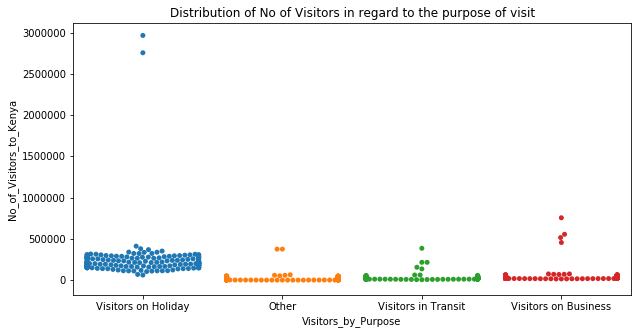

In [83]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Visitors_by_Purpose',y='No_of_Visitors_to_Kenya',data=df)
plt.title('Distribution of No of Visitors in regard to the purpose of visit')

## Histogram Plot

### Histogram for an Attribute in dataset

Text(0.5, 1.0, 'Histogram representing Distribution of No of visitors to kenya')

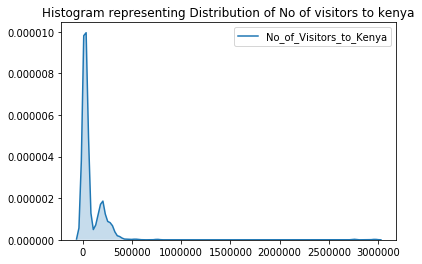

In [84]:
sns.kdeplot(df['No_of_Visitors_to_Kenya'],shade=True)
plt.title('Histogram representing Distribution of No of visitors to kenya')


### Histogram For two Attributes 

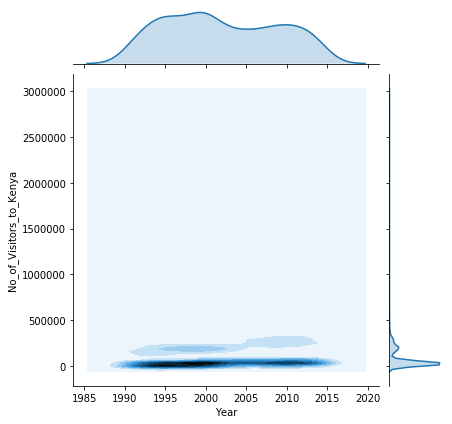

In [85]:
sns.jointplot(x=df['Year'],y=df['No_of_Visitors_to_Kenya'],kind='kde')

# MACHINE LEARNING(PREDICTIVE ANALYTICS)

Split Our data Into 2 for training and testing

In [86]:
from sklearn.model_selection import train_test_split

### To solve :Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [87]:
from numpy import array 

### Trying to make the feature to be an array since its either a single column(-1,1) or 2d column(1,-1)

In [88]:
feature=df.Year

#### Convert int a numpy array

In [89]:
feature=np.array(feature) 

#### Reshape using two brackets

In [90]:
X=feature.reshape((-1,1))

In [91]:
y=df.No_of_Visitors_to_Kenya

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Define Your model

In [93]:
from sklearn import datasets,linear_model

In [94]:
visitors_model=linear_model.LinearRegression()

## Fit our model using the trainind dataset

In [95]:
visitors_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Get the coefficients

In [96]:
print('coefficients: {}'.format(visitors_model.coef_))
print('intercept: {}'.format(visitors_model.intercept_))

coefficients: [3065.03360706]
intercept: -6048444.8081563255


## Y=MX+C

In [97]:
predict_y=visitors_model.predict(X_test)

In [98]:
predict_y

array([ 93882.54038872,  66297.2379252 ,  90817.50678167,  54037.10349697,
        72427.30513932,  57102.13710402, 103077.6412099 ,  96947.57399578,
       124532.87645931, 118402.80924519,  72427.30513932,  66297.2379252 ,
        75492.33874637, 118402.80924519,  87752.47317461,  60167.17071108,
        81622.40596049,  72427.30513932, 109207.70842402,  72427.30513932,
        72427.30513932,  66297.2379252 ,  96947.57399578, 118402.80924519,
       103077.6412099 ,  87752.47317461, 115337.77563813,  78557.37235343,
        66297.2379252 ,  72427.30513932,  75492.33874637, 115337.77563813,
        66297.2379252 ,  81622.40596049,  90817.50678167, 124532.87645931,
       124532.87645931,  84687.43956755, 124532.87645931,  57102.13710402,
        87752.47317461,  90817.50678167, 121467.84285225,  78557.37235343,
        66297.2379252 ,  66297.2379252 ,  63232.20431814,  72427.30513932,
        81622.40596049,  81622.40596049,  69362.27153226,  90817.50678167,
       103077.6412099 ,  

### I want to predict at 2019 how many visitors will come to kenya

In [99]:
new_year=2019

#### Change the object into numpy array

In [100]:
new_y1=np.array(new_year).reshape(-1,1)

#### Then predict

In [101]:
print('Predicted No of visitors 2019: {}'.format(visitors_model.predict(new_y1)))

Predicted No of visitors 2019: [139858.0444946]


#### Evaluate how Accurate our prediction

In [102]:
from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,predict_y)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,predict_y)))#square of MAE
print('RMSE: {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,predict_y))))#squaroot of MAE

MAE: 75628.55677136254
MSE: 7860139377.4128895
RMSE: 275.0064667809878


### PLotting Our predicted value

Text(0.5, 1.0, 'Scatter plot of Trained data')

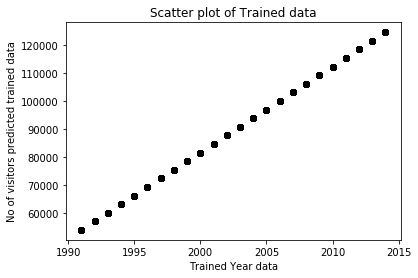

In [103]:
plt.scatter(X_train,visitors_model.predict(X_train),color='black')
plt.xlabel('Trained Year data')
plt.ylabel('No of visitors predicted trained data')
plt.title('Scatter plot of Trained data')

### PLotting Our predicted value

Text(0.5, 1.0, 'Scatter plot of Test data')

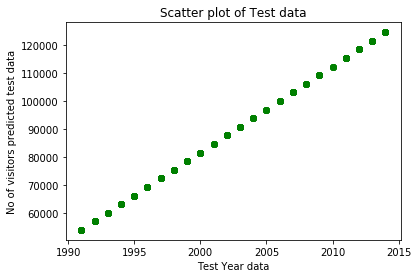

In [104]:
plt.scatter(X_test,visitors_model.predict(X_test),color='green')
plt.xlabel('Test Year data')
plt.ylabel('No of visitors predicted test data')
plt.title('Scatter plot of Test data')


#### From the weak correlation between the datasets hence the LINEAR REGRESSION MODEL does not give accurate prediction model therefore we can try modelling using DECESION TREE/RANDOM FOREST REGRESSOR MODEL for Predictive analytics

## DECISION TREE CLASSIFIER AND RANDOM FOREST CLASSIFIER

In [131]:
df.columns

Index(['Arrival_or_Departure', 'Date_End_of_Quater', 'No_of_Visitors_to_Kenya',
       'Visitors_by_Purpose', 'Period_Quater', 'Results_Status', 'Year'],
      dtype='object')

In [132]:
Y=df['No_of_Visitors_to_Kenya']

In [145]:
x=np.array(df['Year']).reshape(-1,1)

In [146]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3)

In [161]:
#define the model
from sklearn.tree import DecisionTreeRegressor
Model=DecisionTreeRegressor(random_state=1)

In [163]:
#fitting the model
Model.fit(x_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [164]:
#predict 
Pre_y=Model.predict(x_test)

In [167]:
#predicion Accuracy
from sklearn import metrics
print('MAE:\n{}'.format(mean_absolute_error(Y_test,Pre_y)))
print('MSE:\n{}'.format(mean_squared_error(Y_test,Pre_y,)))
print('RMSE:\n{}'.format(np.sqrt(mean_absolute_error(Y_test,Pre_y,))))

MAE:
91664.69239706623
MSE:
39192689451.641556
RMSE:
302.7617749932548


In [180]:
from sklearn.ensemble import RandomForestRegressor
Forest_model=RandomForestRegressor(random_state=1,n_estimators=1000)
Forest_model.fit(x_train,Y_train)
predica=Forest_model.predict(x_test)

In [181]:
# prediction Accuracy
from sklearn import metrics
print('MAE:\n{}'.format(mean_absolute_error(Y_test,predica)))
print('MSE:\n{}'.format(mean_squared_error(Y_test,predica)))
print('RMSE:\n{}'.format(np.sqrt(mean_absolute_error(Y_test,predica))))

MAE:
91629.90644989506
MSE:
39192431242.96029
RMSE:
302.7043218222942
